In [1]:
#
import numpy as np
import os, sys

sys.path.insert(0, '/global/homes/q/qmxp55/DESI/bgstargets/py')

from io_ import get_sweep_whole, getBGSbits, flux_to_mag
from io_ import get_random, get_isdesi, get_dict, bgsmask, get_reg, get_svfields, gaiaAEN, match_coord
from cuts import getGeoCuts, bgsbut
from QA import getStats, flow, mollweide, mycmap, plot_sysdens, overdensity, hexbin

import healpy as hp
import astropy.io.fits as fits
import fitsio
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib
from astropy.coordinates import SkyCoord
import astropy.units as units
from astropy.table import Table

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
#
dr = 'dr9'
#survey = 'south' #is either south (DECaLS+DES) or north (BASS/MzLS)
version = '0.1.0'
filesdir = '/global/cscratch1/sd/qmxp55/bgstargets_output/'
Nranfiles = 3
#reg = 'south'
dec_resol_ns = 32.375
if (dr == 'dr9sv'): Nranfiles = 20 # because the randoms for dr9d have a density of 100000 = 5000*20

pathdir = os.path.abspath(os.getcwd())+'/%s_%s_north_vs_south' %(dr, version)
ispathdir = os.path.isdir(pathdir)
if not ispathdir: os.mkdir(pathdir)

# for healpy
dr8pix     = '/project/projectdirs/desi/target/catalogs/dr8/0.31.1/pixweight/pixweight-dr8-0.31.1.fits'
dr9pix = '/global/cfs/cdirs/desi/target/catalogs/dr9m/0.44.0/pixweight/main/resolve/bright/pixweight-bright.fits'

if dr[:3] == 'dr8': pixfile = dr8pix
elif dr[:3] == 'dr9': pixfile = dr9pix
    
hdr          = fits.getheader(pixfile,1)
nside,nest   = hdr['hpxnside'],hdr['hpxnest']
npix         = hp.nside2npix(nside)
pixarea      = hp.nside2pixarea(nside,degrees=True)

In [3]:
#``` python
#
#patch = [100, 285, 29, 35]
patch = [200, 240, 29, 35]

cat_n = get_sweep_whole(patch=patch, dr=dr+'-north', rlimit=None, maskbitsource=False, bgsbits=True, opt='2', sweepdir='/global/cscratch1/sd/qmxp55/bgstargets_output/dr9/north_vs_south/')
cat_s = get_sweep_whole(patch=patch, dr=dr+'-south', rlimit=None, maskbitsource=False, bgsbits=True, opt='2', sweepdir='/global/cscratch1/sd/qmxp55/bgstargets_output/dr9/north_vs_south/')
#```

Progress...N/A%|                                                    |

--------- OPTION 2 ---------
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/sweep/9.0/sweep-200p025-210p030.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/sweep/9.0/sweep-200p030-210p035.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/sweep/9.0/sweep-210p025-220p030.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/sweep/9.0/sweep-210p030-220p035.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/sweep/9.0/sweep-220p025-230p030.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/sweep/9.0/sweep-220p030-230p035.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/sweep/9.0/sweep-230p025-240p030.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/north/sweep/9.0/sweep-230p030-240p035.fits
Total bricks found: 	 8


Progress...100%|####################################################|

Total run time: 31.890888 sec
---- BGSMASK key: ---- 
	 BS, 0, 1
	 MS, 1, 2
	 GC, 2, 4
	 LG, 3, 8
	 allmask, 4, 16
	 nobs, 5, 32
	 SG, 6, 64
	 SGSV, 7, 128
	 FMC, 8, 256
	 FMC2, 9, 512
	 CC, 10, 1024
	 QC_FM, 11, 2048
	 QC_FI, 12, 4096
	 QC_FF, 13, 8192
	 QC_FM2, 14, 16384
	 QC_FI2, 15, 32768
	 QC_FF2, 16, 65536
	 QC_IVAR, 17, 131072
	 BGSW1, 18, 262144
	 bgs_any, 20, 1048576
	 bgs_bright, 21, 2097152
	 bgs_faint, 22, 4194304
	 bgs_sv_any, 30, 1073741824
	 bgs_sv_bright, 31, 2147483648
	 bgs_sv_faint, 32, 4294967296
	 bgs_sv_faint_ext, 33, 8589934592
	 bgs_sv_fibmag, 34, 17179869184
	 bgs_sv_lowq, 35, 34359738368
---- Sanity Check ---- 
	 BS, 8094660, 8094660
	 MS, 7851095, 7851095
	 GC, 8145998, 8145998
	 LG, 8123014, 8123014
	 allmask, 7614868, 7614868
	 nobs, 6268740, 6268740
	 SG, 7538042, 7538042
	 SGSV, 7548551, 7548551
	 FMC, 7808566, 7808566
	 FMC2, 7811734, 7811734
	 CC, 5937201, 5937201
	 QC_FM, 8013493, 8013493
	 QC_FI, 6265810, 6265810
	 QC_FF, 7958269, 7958269
	 QC_FM2, 81

Progress...N/A%|                                                    |

Total run time: 201.544942 sec
--------- OPTION 2 ---------
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/sweep/9.0/sweep-200p025-210p030.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/sweep/9.0/sweep-200p030-210p035.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/sweep/9.0/sweep-210p025-220p030.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/sweep/9.0/sweep-210p030-220p035.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/sweep/9.0/sweep-220p025-230p030.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/sweep/9.0/sweep-220p030-230p035.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/sweep/9.0/sweep-230p025-240p030.fits
/global/cfs/cdirs/cosmo/work/legacysurvey/dr9/south/sweep/9.0/sweep-230p030-240p035.fits
Total bricks found: 	 8


Progress...100%|####################################################|

Total run time: 94.709854 sec
---- BGSMASK key: ---- 
	 BS, 0, 1
	 MS, 1, 2
	 GC, 2, 4
	 LG, 3, 8
	 allmask, 4, 16
	 nobs, 5, 32
	 SG, 6, 64
	 SGSV, 7, 128
	 FMC, 8, 256
	 FMC2, 9, 512
	 CC, 10, 1024
	 QC_FM, 11, 2048
	 QC_FI, 12, 4096
	 QC_FF, 13, 8192
	 QC_FM2, 14, 16384
	 QC_FI2, 15, 32768
	 QC_FF2, 16, 65536
	 QC_IVAR, 17, 131072
	 BGSW1, 18, 262144
	 bgs_any, 20, 1048576
	 bgs_bright, 21, 2097152
	 bgs_faint, 22, 4194304
	 bgs_sv_any, 30, 1073741824
	 bgs_sv_bright, 31, 2147483648
	 bgs_sv_faint, 32, 4294967296
	 bgs_sv_faint_ext, 33, 8589934592
	 bgs_sv_fibmag, 34, 17179869184
	 bgs_sv_lowq, 35, 34359738368
---- Sanity Check ---- 
	 BS, 13228453, 13228453
	 MS, 12900871, 12900871
	 GC, 13302524, 13302524
	 LG, 13276250, 13276250
	 allmask, 13226642, 13226642
	 nobs, 13277453, 13277453
	 SG, 12686229, 12686229
	 SGSV, 12692748, 12692748
	 FMC, 13228165, 13228165
	 FMC2, 13230342, 13230342
	 CC, 12625366, 12625366
	 QC_FM, 13186668, 13186668
	 QC_FI, 13272908, 13272908
	 QC_FF, 129

In [3]:
#load catalogues
    
cat_s = np.load('/global/cscratch1/sd/qmxp55/bgstargets_output/dr9/north_vs_south/dr9-south_sweep_200_240_29_35.npy')
cat_n = np.load('/global/cscratch1/sd/qmxp55/bgstargets_output/dr9/north_vs_south/dr9-north_sweep_200_240_29_35.npy')

# %time cat_s = np.load(filesdir+dr+'/'+version+'/'+'bgstargets-'+'south'+'_100.0_285.0_29.0_35.0.npy')
# %time cat_s_ex = np.load(filesdir+dr+'/'+version+'/'+'extra-'+'south'+'_100.0_285.0_29.0_35.0_n256.npy')

# %time cat_n = np.load(filesdir+dr+'/'+version+'/'+'bgstargets-'+'north'+'_100.0_285.0_29.0_35.0.npy')
# %time cat_n_ex = np.load(filesdir+dr+'/'+version+'/'+'extra-'+'north'+'_100.0_285.0_29.0_35.0_n256.npy')


In [4]:
#
def get_extra(cat):
    
    extra = Table()
    
    extra['hppix'] = hp.ang2pix(nside,(90.-cat['DEC'])*np.pi/180.,cat['RA']*np.pi/180.,nest=True)
    print('healpix DONE...')
    c = SkyCoord(cat['RA']*units.degree,cat['DEC']*units.degree, frame='icrs')
    extra['b'] = c.galactic.b.value # galb coordinate
    extra['l'] = c.galactic.l.value # galb coordinate
    print('galactic coordinates DONE...')
    
    regs = ['des', 'decals', 'north', 'desi', 'south']
    for i in regs:
        reg_ = get_reg(reg=i, hppix=extra['hppix'])
        extra[i] = reg_
        print(i, 'DONE...')
        
    return extra
    

In [5]:
#
cat_s_ex = get_extra({i:cat_s[i] for i in ['RA', 'DEC']})
#np.save(savefile, tab)

healpix DONE...
galactic coordinates DONE...
des DONE...
decals DONE...
north DONE...
desi DONE...
south DONE...


In [6]:
cat_n_ex = get_extra({i:cat_n[i] for i in ['RA', 'DEC']})

healpix DONE...
galactic coordinates DONE...
des DONE...
decals DONE...
north DONE...
desi DONE...
south DONE...


In [8]:
mask_s = (cat_s['DEC'] > 29) & (cat_s_ex['b'] > 0)
mask_n = (cat_n['DEC'] < 35) & (cat_n_ex['b'] > 0)

cat_s, cat_s_ex = cat_s[mask_s], cat_s_ex[mask_s]
cat_n, cat_n_ex = cat_n[mask_n], cat_n_ex[mask_n]

print(np.sum(mask_s), np.sum(mask_n))

13302524 8145998


In [9]:
if dr == 'dr9sv': N = 1
else: N = Nranfiles
    
%time ran = np.load(filesdir+dr+'/'+dr+'_random_N'+str(N)+'.npy')
%time ran_ex = np.load(filesdir+dr+'/'+'extra_random_N'+str(N)+'_n256.npy')

CPU times: user 178 µs, sys: 10.1 s, total: 10.1 s
Wall time: 10.8 s
CPU times: user 0 ns, sys: 45.9 s, total: 45.9 s
Wall time: 47.7 s


In [10]:
mask_ran = (ran['DEC'] > 29) & (ran['DEC'] < 35) & (ran_ex['b'] > 0)
ran, ran_ex = ran[mask_ran], ran_ex[mask_ran]
rancuts = getGeoCuts(ran, randoms=True)

In [7]:
!ls /global/cscratch1/sd/qmxp55/bgstargets_output/dr9/0.1.0/

TEST_bgstargets_south.npy  bgstargets_south.npy
bgskey.txt		   bgstargets_sv_only.npy
bgstargets-north	   extra-north_n256.npy
bgstargets-south	   north_vs_south_match_0.5arcsec.fits
bgstargets.npy		   svfields_bgsbits.npy
bgstargets_north.npy	   toremove


In [3]:
#
savefile = '/global/cscratch1/sd/qmxp55/bgstargets_output/%s/%s/north_vs_south_match_0.5arcsec' %(dr, version)

if os.path.isfile(savefile+'.fits'):
    tab = fitsio.read(savefile+'.fits')
else:
    
    #match dr8_bass with dr8_decals 
    idx2, idx1, d2d, d_ra, d_dec = match_coord(cat_n['RA'], cat_n['DEC'], cat_s['RA'], cat_s['DEC'], search_radius=0.5)
    
    plt.figure(figsize=(8, 4))
    plt.hist(d2d, 40, log=True, color='k')

    std1 = np.std(d2d)
    mean = np.mean(d2d)

    perc = 99.0
    plt.axvline(mean, ls='--', c='r', lw=2, label='mean: %.2f' %(mean))
    plt.axvline(mean+3*std1, ls='--', c='b', lw=2)
    plt.axvline(np.percentile(d2d, perc), ls='--', c='g', lw=2, label='%.2f%%' %(perc))

    print('mean: %.3f, \t std: %.3f' %(mean, std1))
    print('3-sigma: %.3f \t %.3f' %(mean+3*std1, mean-3*std1))
    plt.legend()
    
    #Make a general catalogue containing the matched objects in north & south

    tab = Table()

    for key in cat_n.dtype.names:

        tab[key+'_n'] = cat_n[key][idx2]
        tab[key+'_s'] = cat_s[key][idx1]

    savefile = '/global/cscratch1/sd/qmxp55/bgstargets_output/%s/%s/north_vs_south_match_0.5arcsec' %(dr, version)
    tab.write(savefile+'.fits', format='fits')
    #np.save(savefile, tab)
    

In [4]:
#completeness
nobs_n = (tab['NOBS_R_n'] > 0) & (tab['NOBS_G_n'] > 0) & (tab['NOBS_Z_n'] > 0)
nobs_s = (tab['NOBS_R_s'] > 0) & (tab['NOBS_G_s'] > 0) & (tab['NOBS_Z_s'] > 0)
nobs = (nobs_n) & (nobs_s)


``` python
savefile = '/global/cscratch1/sd/qmxp55/bgstargets_output/%s/%s/north_vs_south_match_0.5arcsec' %(dr, version)
np.save(savefile, tab)
##tab = np.load(savefile+'.npy')
```

In [5]:
hpdict = {}

nside = 1024
npix = hp.nside2npix(nside)
pixarea = hp.nside2pixarea(nside,degrees=True)

#
hppix = hp.ang2pix(nside,(90.-np.array(tab['DEC_n']))*np.pi/180.,np.array(tab['RA_n'])*np.pi/180.,nest=True)
theta,phi  = hp.pix2ang(nside,np.arange(npix),nest=True)
hpdict['ra'],hpdict['dec'] = 180./np.pi*phi,90.-180./np.pi*theta
#get pixels ids within in north/south overlap
ind,c = np.unique(hppix[nobs],return_counts=True)

#pixels ids for randoms
hppix_ran = hp.ang2pix(nside,(90.-np.array(ran['DEC']))*np.pi/180.,np.array(ran['RA'])*np.pi/180.,nest=True)

#True if pixel is in north/south matched overlap footprint. 
#boolean with size of randoms
keep = np.in1d(hppix_ran, ind)

# computing fracareas
randdens = 5000*Nranfiles
print('randdens = ', randdens, ' ; len randoms = ', len(hppix_ran))
    
ind_ran, c_ran = np.unique(hppix_ran[keep],return_counts=True)
#fracarea for total randoms
hpdict['fracarea'] = np.zeros(npix)
hpdict['fracarea'][ind_ran] = c_ran / randdens / pixarea
print('fracarea DONE...')
#fracarea for reduced area (i.e., for BGS)
ind_ran, c_ran = np.unique(hppix_ran[(keep) & (rancuts['BS']) & (rancuts['GC']) & (rancuts['nobs'])],return_counts=True)
hpdict['redfracarea'] = np.zeros(npix)
hpdict['redfracarea'][ind_ran] = c_ran / randdens / pixarea
print('redfracarea DONE...')

# areas
hpdict['area'] = hpdict['fracarea'].sum() * pixarea
hpdict['redarea'] = hpdict['redfracarea'].sum() * pixarea

print(hpdict['area'])
print(hpdict['redarea'])

NameError: name 'ran' is not defined

In [6]:
#
def get_bgs(cat0, bgsmask=bgsmask(), rlimit=True):
    
#     cat0 = {}
#     for i in ['BGSBITS', 'RMAG', 'ZMAG', 'GMAG', 'W1MAG', 'RFIBERMAG']:
#         cat0[i] = cat['%s_%s'] %(i,reg) if reg is not None else cat[i]
    
    bgs = {}
    bgsbut_fracs_but_lg = bgsbut(bgsbits=cat0['BGSBITS'], rmag=cat0['RMAG'], pop=['QC_FM', 'QC_FI', 'QC_FF', 'LG'], bgsmask=bgsmask, rlimit=21)

    fracs_re = np.ones_like(cat0['RMAG'], dtype=bool)
    for i in (14,15,16): 
        fracs_re &= ((cat0['BGSBITS'] & 2**(i)) != 0)
        
    schlegel_color = (cat0['ZMAG'] - cat0['W1MAG']) - 3/2.5 * (cat0['GMAG'] - cat0['RMAG']) + 1.2
    rfibcol =(cat0['RFIBERMAG'] < 20.75) | ((cat0['RFIBERMAG'] < 21.5) & (schlegel_color > 0.))
        
    if rlimit:
        bgs['clustering'] = (bgsbut_fracs_but_lg) & (fracs_re) & (cat0['RMAG'] < 20.0)
        bgs['nominal'] = (bgsbut_fracs_but_lg) & (cat0['RMAG'] < 20.0)
        bgs['fibcolor'] = ((bgsbut_fracs_but_lg) & (cat0['RMAG'] < 19.5)) | ((bgsbut_fracs_but_lg) & (rfibcol) & (cat0['RMAG'] > 19.5) & (cat0['RMAG'] < 20.3))
    else:
        bgs['clustering'] = (bgsbut_fracs_but_lg) & (fracs_re)
        bgs['nominal'] = (bgsbut_fracs_but_lg)
        bgs['fibcolor'] = ((bgsbut_fracs_but_lg) & (cat0['RMAG'] < 19.5)) | ((bgsbut_fracs_but_lg) & (rfibcol) & (cat0['RMAG'] > 19.5))

    return bgs


In [12]:
#
bgskeys = ['BGSBITS', 'RMAG', 'ZMAG', 'GMAG', 'W1MAG', 'RFIBERMAG']
bgs_n = get_bgs({i:cat_n[i] for i in bgskeys}, rlimit=False)
bgs_s = get_bgs({i:cat_s[i] for i in bgskeys}, rlimit=False)

for key in bgs_s.keys():
    print('========= %s =========' %(key))
    #get BGS flag in both:
    bgs_bass = bgs_n[key]
    bgs_decals = bgs_s[key]

    bass_match = np.zeros_like(cat_n['DEC'], dtype=bool)
    decals_match = np.zeros_like(cat_s['DEC'], dtype=bool)
    bgsbassindecals = decals_match.copy()
    bgsdecalsinbass = bass_match.copy()
    decals_match[idx1] = True #flag for matches in dr8_decals
    bass_match[idx2] = True #flag for matches in dr8_bass
    bgsdecalsinbass[idx2] = bgs_decals[idx1] #bass flag of bgs in decals
    bgsbassindecals[idx1] = bgs_bass[idx2] #decals flag of bgs in bass

    #print(np.sum(bass_match))
    #print(np.sum(decals_match))

    tot = np.sum(bass_match)
    totB = np.sum((bass_match) & (bgs_bass))
    totD = np.sum((decals_match) & (bgs_decals))
    #get bgs matched in each catalogue:
    print('total matched: \t %i' %(tot))
    print('\t & BGS_bass: \t %.2f %%' %(100*np.sum((bass_match) & (bgs_bass))/tot))
    print('\t\t & BGS_bass & (BGS_decals): \t %.2f %%' %(100*np.sum((bass_match) & (bgs_bass) & (bgsdecalsinbass))/totB))
    print('\t\t & BGS_bass & (~BGS_decals): \t %.2f %%' %(100*np.sum((bass_match) & (bgs_bass) & (~bgsdecalsinbass))/totB))
    print('\t & BGS_decals: \t %.2f %%' %(100*np.sum((decals_match) & (bgs_decals))/tot))
    print('\t\t & BGS_decals & (BGS_bass): \t %.2f %%' %(100*np.sum((decals_match) & (bgs_decals) & (bgsbassindecals))/totD))
    print('\t\t & BGS_decals & (~BGS_bass): \t %.2f %%' %(100*np.sum((decals_match) & (bgs_decals) & (~bgsbassindecals))/totD))


NameError: name 'cat_n' is not defined

In [7]:
#
bgskeys = ['BGSBITS', 'RMAG', 'ZMAG', 'GMAG', 'W1MAG', 'RFIBERMAG']
bgs_n = get_bgs({i:tab[i+'_n'] for i in bgskeys}, rlimit=False)
bgs_s = get_bgs({i:tab[i+'_s'] for i in bgskeys}, rlimit=False)

#get stars and galaxies using our gaia classification
stars_n = ((tab['BGSBITS_n'] & 2**(6)) == 0)
stars_s = ((tab['BGSBITS_s'] & 2**(6)) == 0)
# bgs_s = get_bgs(tab, BGSBITS='BGSBITS_s', RMAG='RMAG_s')
# bgs_n = get_bgs(tab, BGSBITS='BGSBITS_n', RMAG='RMAG_n')
PSF_s = tab['TYPE_s'] == 'PSF '
PSF_n = tab['TYPE_n'] == 'PSF '
inGAIA_n = (tab['G_n'] != 0)
inGAIA_s = (tab['G_s'] != 0)

for key in bgs_s.keys():
    print('========= %s =========' %(key))
    
    tot = len(tab)
    tot_red = np.sum(nobs)
    totB = np.sum((nobs) & (bgs_n[key]))
    totD = np.sum((nobs) & (bgs_s[key]))
    #get bgs matched in each catalogue:
    print('total matched: \t %i' %(tot))
    print('total matched with at least 1 obs in the 3 bands for both samples (tot complete): \t %i' %(tot_red))
    print('------ Results below are restricted to nobs_{G,R,Z} > 0 in both, BASS/MzLS and DECaLS ------')
    print('\t & BGS_bass: \t %.2f %%' %(100*np.sum((nobs) & (bgs_n[key]))/tot_red))
    print('\t\t & BGS_bass & (BGS_decals): \t %.2f %%' %(100*np.sum((nobs) & (bgs_n[key]) & (bgs_s[key]))/totB))
    print('\t\t & BGS_bass & (~BGS_decals): \t %.2f %%' %(100*np.sum((nobs) & (bgs_n[key]) & (~bgs_s[key]))/totB))
    print('\t & BGS_decals: \t %.2f %%' %(100*np.sum((nobs) & (bgs_s[key]))/tot_red))
    print('\t\t & BGS_decals & (BGS_bass): \t %.2f %%' %(100*np.sum((nobs) & (bgs_s[key]) & (bgs_n[key]))/totD))
    print('\t\t & BGS_decals & (~BGS_bass): \t %.2f %%' %(100*np.sum((nobs) & (bgs_s[key]) & (~bgs_n[key]))/totD))
    

========= clustering =========
total matched: 	 5563552
total matched with at least 1 obs in the 3 bands for both samples (tot complete): 	 3801457
------ Results below are restricted to nobs_{G,R,Z} > 0 in both, BASS/MzLS and DECaLS ------
	 & BGS_bass: 	 7.25 %
		 & BGS_bass & (BGS_decals): 	 97.12 %
		 & BGS_bass & (~BGS_decals): 	 2.88 %
	 & BGS_decals: 	 7.46 %
		 & BGS_decals & (BGS_bass): 	 94.34 %
		 & BGS_decals & (~BGS_bass): 	 5.66 %
========= nominal =========
total matched: 	 5563552
total matched with at least 1 obs in the 3 bands for both samples (tot complete): 	 3801457
------ Results below are restricted to nobs_{G,R,Z} > 0 in both, BASS/MzLS and DECaLS ------
	 & BGS_bass: 	 7.28 %
		 & BGS_bass & (BGS_decals): 	 97.01 %
		 & BGS_bass & (~BGS_decals): 	 2.99 %
	 & BGS_decals: 	 7.48 %
		 & BGS_decals & (BGS_bass): 	 94.41 %
		 & BGS_decals & (~BGS_bass): 	 5.59 %
========= fibcolor =========
total matched: 	 5563552
total matched with at least 1 obs in the 3 bands fo

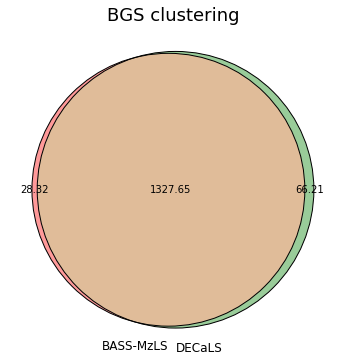

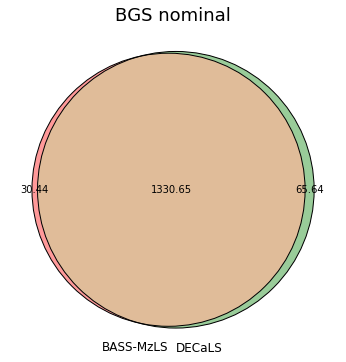

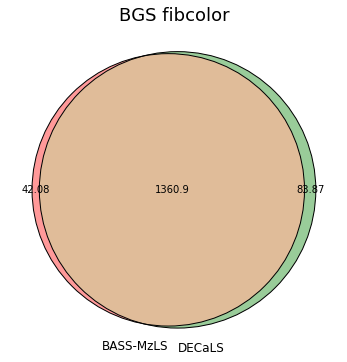

In [69]:
from QA import plot_venn2

for key in bgs_s.keys():
    #print('========= %s =========' %(key))
    
    A = (nobs) & (bgs_n[key])
    B = (nobs) & (bgs_s[key])
    plot_venn2(A,B,hpdict['redarea'], title='BGS %s' %(key), labels=['BASS-MzLS', 'DECaLS'], savefile=None)
    

In [22]:
#
bgsdict = {'BGS both':(nobs) & (bgs_n) & (bgs_s), 'BGS DECaLS only':(nobs) & (~bgs_n) & (bgs_s), 'BGS BASS/MzLS only':(nobs) & (bgs_n) & (~bgs_s)}

for num, (key, val) in enumerate(bgsdict.items()):
    print(num, key, np.sum(val)/hpdict['redarea'])

0 BGS both 1291.342429712842
1 BGS DECaLS only 66.08164028211868
2 BGS BASS/MzLS only 27.45120771118088


In [8]:
#

def plot_fit(coords=None, catmask=None, xsigma=2, filename=None, verbose=False, ylim=None, vmax=None):
    
    fit_dict = {}

    for num, coord in enumerate(coords):

        keys = list(coord.keys())
        #remove infs
        infs = (np.isfinite(coord[keys[0]])) & ((np.isfinite(coord[keys[1]])))

        if ylim is None: ylim=[-0.3, 0.3]

        rows, cols = 1, len(catmask.keys())
        fig    = plt.figure(figsize=(9*cols,7*rows))
        gs     = gridspec.GridSpec(rows, cols, hspace=0.2, wspace=0.10)
        cmap = plt.get_cmap('coolwarm', 8)

        if verbose: print('===== x:%s \t y:%s ===== ' %(keys[0], keys[1]))

        for i, (key, val) in enumerate(catmask.items()):
            ax = fig.add_subplot(gs[i])
            x, y = coord[keys[0]], coord[keys[1]]

            clipped = True
            if clipped:
                #clipx = np.percentile(x[(val) & (np.isfinite(x))], (3,97))
                mean = np.mean(x[(val) & (np.isfinite(x))])
                sigma = np.std(x[(val) & (np.isfinite(x))])
                clipx = 0, 2 #
                clipx0 = mean-xsigma*sigma, mean+xsigma*sigma
                if verbose: print(r'$\mu$= %.3f \t $1-\Sigma=$%.3f' %(mean, sigma))
                if verbose: print('%i-sigma values: \t %.3f \t %.3f' %(xsigma, clipx0[0], clipx0[1]))
                if keys[0][1:2] == 'r': clipx = [17, 20.4]
                clipy = np.percentile(y[(val) & (np.isfinite(y))], (.1,99.5))
                clipmask = (x > clipx[0]) & (x < clipx[1]) & (y > clipy[0]) & (y < clipy[1])
                val = (val) & (clipmask) #& (finite)
                xlim = clipx
                if keys[0][1:3] == 'r_': xlim = [17, xlim[1]]

            xmin, xmax = clipx[0], clipx[1] #np.percentile(x[val], (3, 97))

            if verbose: print('%s: median = %.4f, mean = %.4f, x(3%%):%.4f, x(97%%):%.4f' 
                  %(key, np.median(y[val]), np.mean(y[val]), xmin, xmax))

            ax, binc, median = hexbin(coord=coord, catmask=val, n=i, bins='log', title=key, cmap=cmap, 
                   ylab=(i == 0), xlab=True, vline=None, hline=None, fig=fig, gs=gs, vmin=1, vmax=vmax, mincnt=1, 
                       file=None, fracs=False, area=None, 
                           cbar='horizontal', xlim=xlim, ylim=ylim, showmedian=True)

            ax.axhline(0, ls=':', lw=2, color='k')
            ax.axvline(xmin, ls='-', lw=1, color='k', alpha=1)
            ax.axvline(xmax, ls='-', lw=1, color='k', alpha=1)

            #best-fit
            z = np.polyfit(x[val], y[val], 1)
            z0 = np.polyfit(binc, median, 1)
            z1 = np.polyfit(binc, median, 0)
            p = np.poly1d(z)
            p0 = np.poly1d(z0)
            p1 = np.poly1d(z1)
            xfit = np.linspace(xlim[0], xlim[1], 30)
            
            #
            #write out best-fit parameters
            dx = np.abs(xlim[1] - xlim[0])/17.
            dy = np.abs(ylim[1] - ylim[0])/17.
            props = dict(boxstyle='round', facecolor='greenyellow', alpha=0.7)

            fit = r'%s = %.3f %s %s %.3f' %(keys[1], z[0], keys[0], '+' if z[1] > 0 else '-',z[1] if z[1] > 0 else -1 * z[1])
            fit0 = r'%s = %.3f %s %s %.3f' %(keys[1], z0[0], keys[0], '+' if z0[1] > 0 else '-',z0[1] if z0[1] > 0 else -1 * z0[1])
            fit1 = r'%s = %.3f' %(keys[1], z1[0])
            #fit_dict[key.split(' ')[0]+'_'+str(num)+'_cons'] = fit1
            if keys[0][1:2] == 'r':
                ax.text(xlim[0]+dx, ylim[1]-2*dy, fit1, size=14, bbox=props)
                ax.plot(xfit, p1(xfit), '-', lw=1.5, color='b', ls='--', alpha=0.6)
                fit_dict[key.split(' ')[0]+'_'+str(num)] = fit1
            else:
#                 ax.text(xlim[0]+dx, ylim[1]-2*dy, fit, size=14, bbox=props)
#                 ax.plot(xfit, p(xfit), '--', lw=1.5, color='k')
                ax.text(xlim[0]+dx, ylim[1]-2*dy, fit0, size=14, bbox=props)
                ax.plot(xfit, p0(xfit), '--', lw=1.5, color='k')
                fit_dict[key.split(' ')[0]+'_'+str(num)] = [fit0, z0]
        
        if filename is not None:
            file=os.path.join(pathdir, filename+'_%i' %(num))
            if verbose: print(file)
            fig.savefig(file+'.png', bbox_inches = 'tight', pad_inches = 0)
        plt.show()
        
    return fit_dict

def rshift(tab=None, catmask=None, rmag=20):
    
    coords = [
    {
    '$r_{BASS}$':(tab['RMAG_n']),
    '$r_{DECaLS}-r_{BASS}$':(tab['RMAG_s'] - tab['RMAG_n']) 
    },
    {
    '$r_{DECaLS}$':(tab['RMAG_s']),
    '$r_{BASS}-r_{DECaLS}$':(tab['RMAG_n'] - tab['RMAG_s']) 
    }
    ]
    
    rdict = {}
    
    for num, coord in enumerate(coords):
        keys = list(coord.keys())
        x,y  = coord[keys[0]], coord[keys[1]]

        for i, (key, val) in enumerate(catmask.items()):

            clipped = True
            if clipped:
                clipx = np.percentile(x[(val) & (np.isfinite(x))], (0.1,99.5))
                clipy = np.percentile(y[(val) & (np.isfinite(y))], (.1,99.5))
                clipmask = (x > clipx[0]) & (x < clipx[1]) & (y > clipy[0]) & (y < clipy[1])
                val = (val) & (clipmask)

            z = np.polyfit(x[val], y[val], 1)
            r_prime = z[0] * rmag + z[1] + rmag
            rdict['%s_%s' %('bass' if keys[0][4] == 'B' else 'decals', key)] = r_prime
            #print(keys[0][4], keys[0])
    
    return rdict
    

========= fibcolor =========


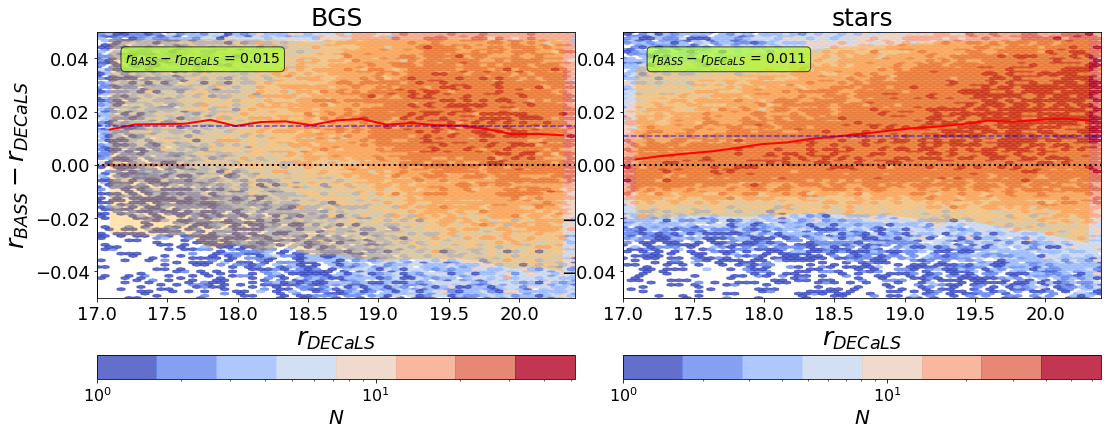

In [9]:
#
coords = [
     {
    '$r_{DECaLS}$':(tab['RMAG_s']),
    '$r_{BASS}-r_{DECaLS}$':(tab['RMAG_n'] - tab['RMAG_s']) 
    }
]
fit_dict_r = {}
for key in ['fibcolor']:
    print('========= %s =========' %(key))
    
    catmask = {'BGS':(bgs_n[key]) & (bgs_s[key]) & (nobs), 'stars':(stars_n) & (stars_s) & (nobs)}
    fit_dict_r[key] = plot_fit(coords, catmask, xsigma=2, ylim=[-0.05, 0.05], filename='rmag_diff_%s' %(key))
    

========= fibcolor =========


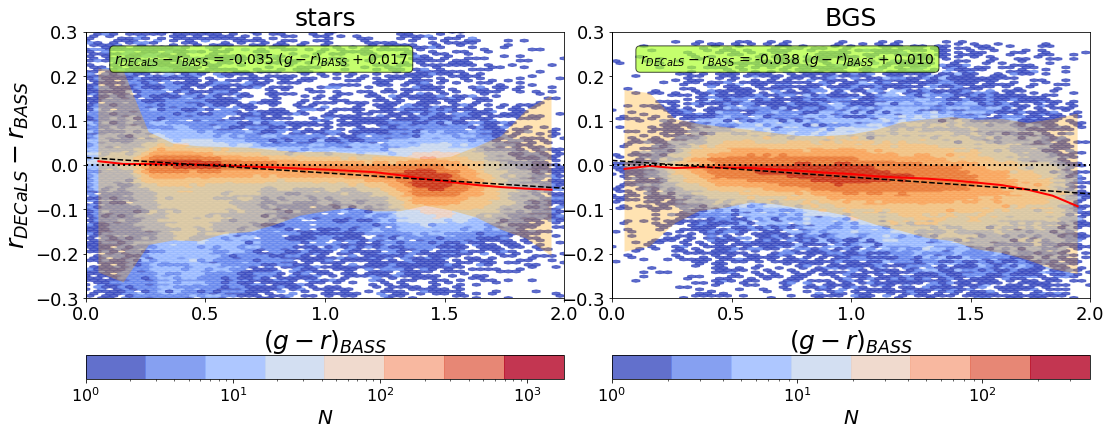

In [10]:
#
coords = [
    {
    '$(g-r)_{BASS}$':(tab['GMAG_n'] - tab['RMAG_n']),
    '$r_{DECaLS}-r_{BASS}$':(tab['RMAG_s'] - tab['RMAG_n']) 
    }
]
fit_dict = {}
for key in ['fibcolor']:
    print('========= %s =========' %(key))
    
    catmask = {'stars':(stars_n) & (stars_s) & (nobs), 'BGS':(bgs_n[key]) & (bgs_s[key]) & (nobs)}
    fit_dict[key] = plot_fit(coords, catmask, xsigma=2, filename='gr_BASS_correction_%s' %(key))
    

In [17]:
#
rcorri = {}
objs = {'stars':'ss', 'BGS':'gg'}
for key in bgs_s.keys():
    for obj, abv in objs.items():
        z = fit_dict[key]['%s_0' %(obj)][1]
        rcorri['%s+%s' %(key, 'bass_%s' %(abv))] = tab['RMAG_n'] + z[0] * (tab['GMAG_n'] - tab['RMAG_n']) + z[1]
        print('%s+%s' %(key, 'bass_%s' %(abv)), z[0], z[1])
        

clustering+bass_ss -0.0345418930053711 0.01655695061934623
clustering+bass_gg -0.038614892959594735 0.010884453120984542
nominal+bass_ss -0.0345418930053711 0.01655695061934623
nominal+bass_gg -0.038580004374186204 0.010857695863957998
fibcolor+bass_ss -0.0345418930053711 0.01655695061934623
fibcolor+bass_gg -0.03820300102233888 0.010839474828619718


In [295]:
rcorri['nominal+bass_gg']

<Column name='RMAG_n' dtype='float32' length=5563552>
      inf
      inf
      inf
      inf
      inf
      inf
      inf
      inf
      inf
      inf
      inf
      inf
      ...
23.044638
21.786287
23.027548
23.597471
23.126661
21.728338
 21.62263
 23.52665
19.950624
 19.12665
 23.18238
25.663994

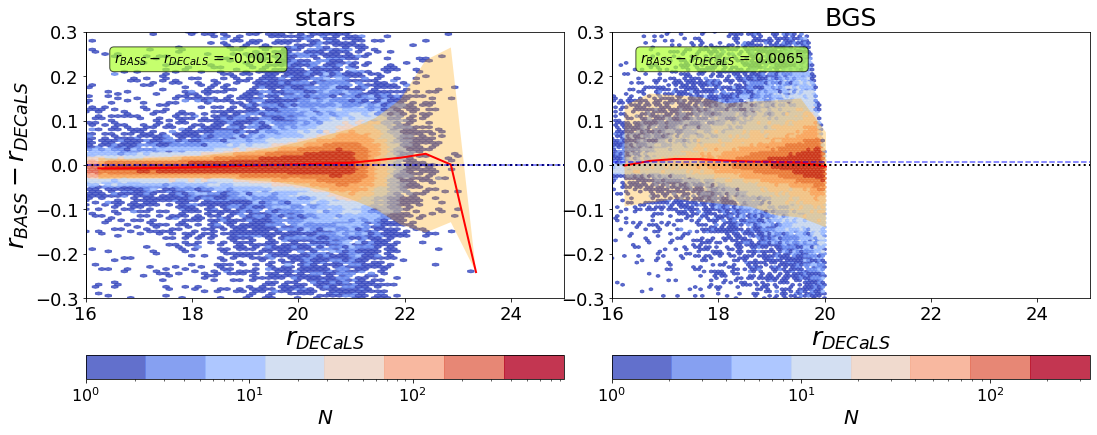

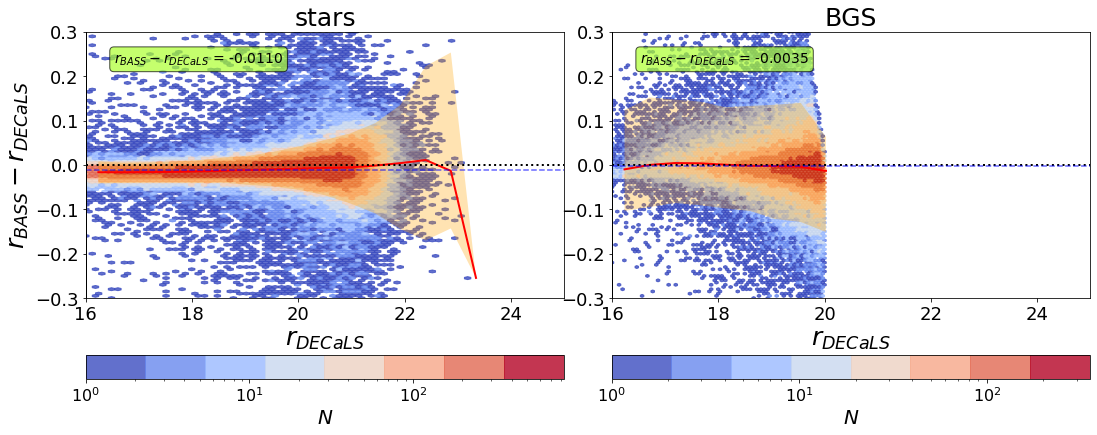

In [299]:
#
for i in ['ss', 'gg']:
    
    coords = [
         {
        '$r_{DECaLS}$':(tab['RMAG_s']),
        '$r_{BASS}-r_{DECaLS}$':(rcorri['nominal+bass_%s' %(i)] - tab['RMAG_s']) 
        }
    ]
    key = 'nominal'
    catmask = {'stars':(stars_n) & (stars_s) & (nobs), 'BGS':(bgs_n[key]) & (bgs_s[key]) & (nobs)}
    plot_fit(coords, catmask, xsigma=2, filename='rmag_diff_corrected_%s_%s' %(i, key))
    

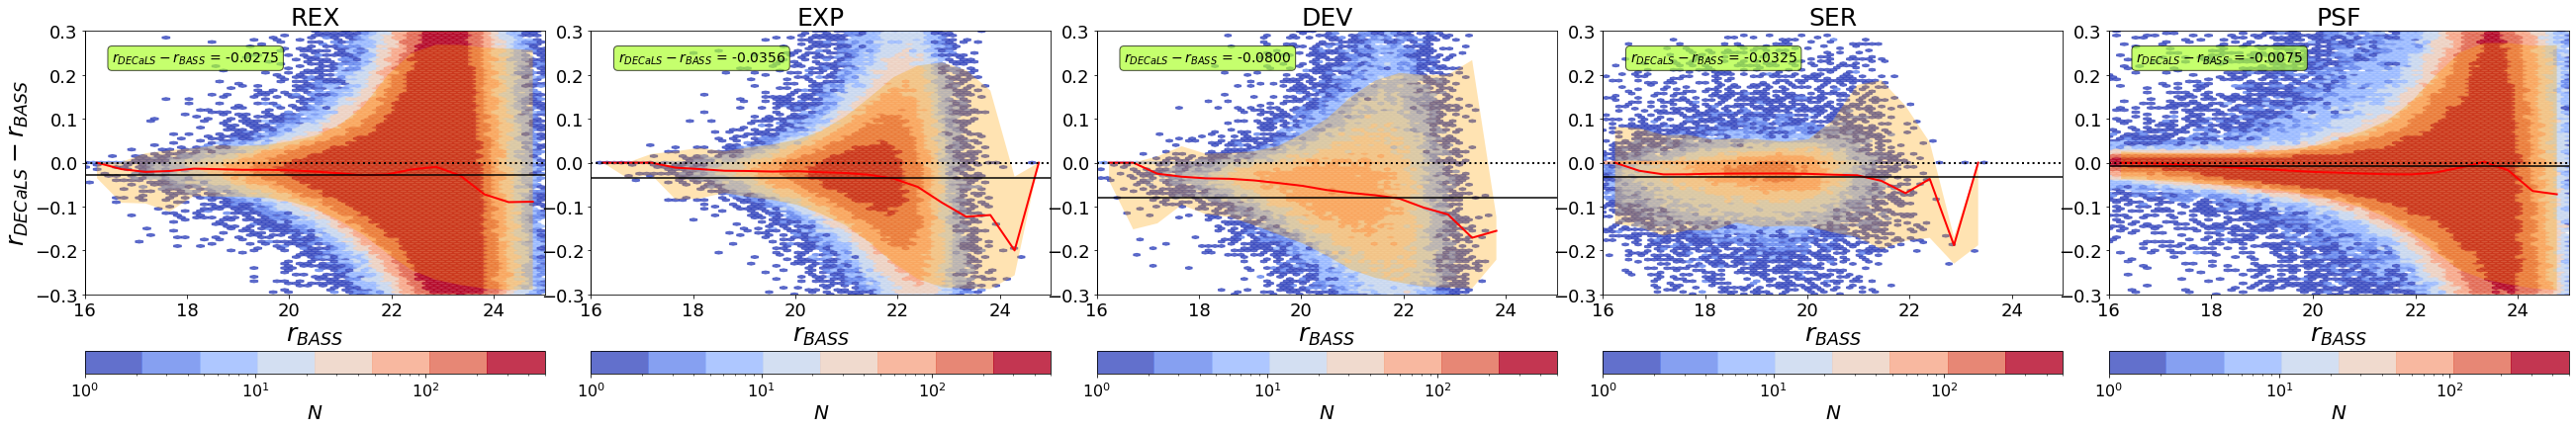

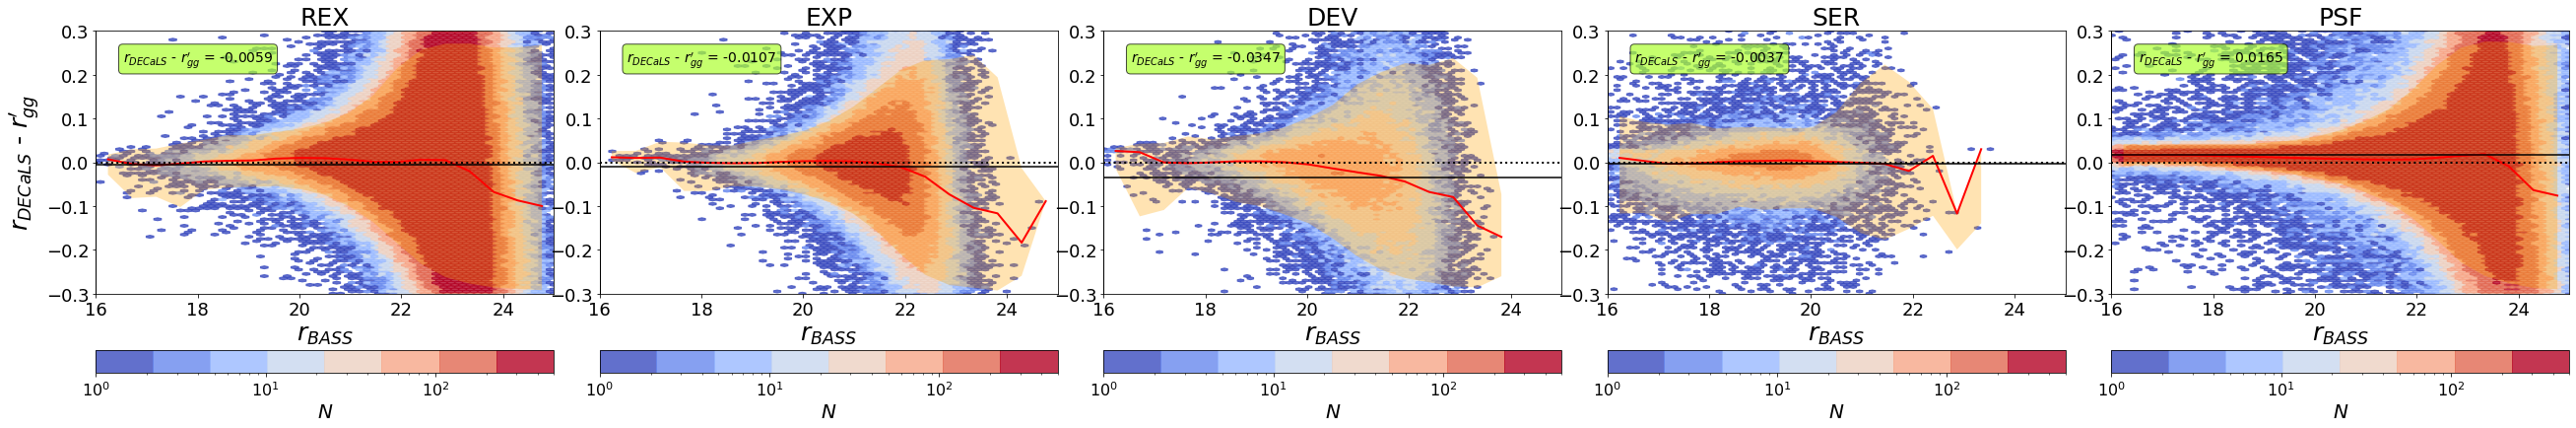

In [63]:
#
coords = [
    {
    '$r_{BASS}$':(tab['RMAG_n']),
    '$r_{DECaLS}-r_{BASS}$':(tab['RMAG_s'] - tab['RMAG_n']) 
    },
    {
    '$r_{BASS}$':(tab['RMAG_n']),
    '$r_{DECaLS}$ - %s' %('$r^{\prime}_{gg}$'):(tab['RMAG_s'] - rcorr['nominal+bass_gg'])
    }
]

morphos = ['REX', 'EXP', 'DEV', 'SER', 'PSF']

#catmask = {'stars in both':(stars_n) & (stars_s) & (infs) & (nobs), 'BGS in both':(bgs_n) & (bgs_s) & (infs) & (nobs)}
catmask = {morph:(tab['TYPE_n'] == morph) & (tab['TYPE_s'] == morph) & (nobs) for morph in morphos}

fit_dict_morph = plot_fit(coords, catmask, filename='morphos_bass', vmax=500)

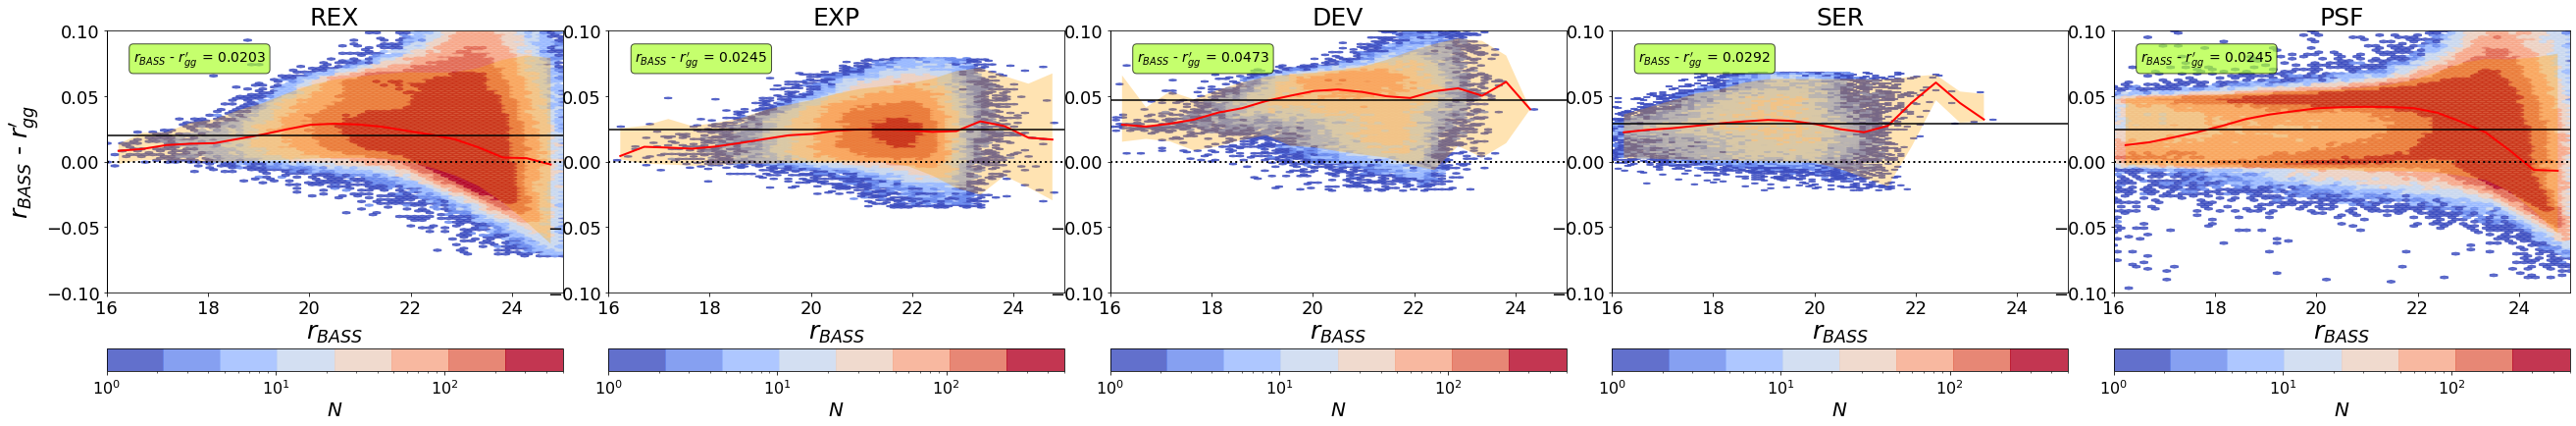

In [39]:
coords = [
        {
    '$r_{BASS}$':(tab['RMAG_n']),
    '$r_{BASS}$ - %s' %('$r^{\prime}_{gg}$'):(tab['RMAG_n'] - rcorr['bass_gg'])
    }
]

morphos = ['REX', 'EXP', 'DEV', 'SER', 'PSF']

#catmask = {'stars in both':(stars_n) & (stars_s) & (infs) & (nobs), 'BGS in both':(bgs_n) & (bgs_s) & (infs) & (nobs)}
catmask = {morph:(tab['TYPE_n'] == morph) & (tab['TYPE_s'] == morph) & (nobs) for morph in morphos}

fit_dict_morph2 = plot_fit(coords, catmask, filename='morphos_bass_dif', vmax=500, ylim=[-0.1, 0.1])

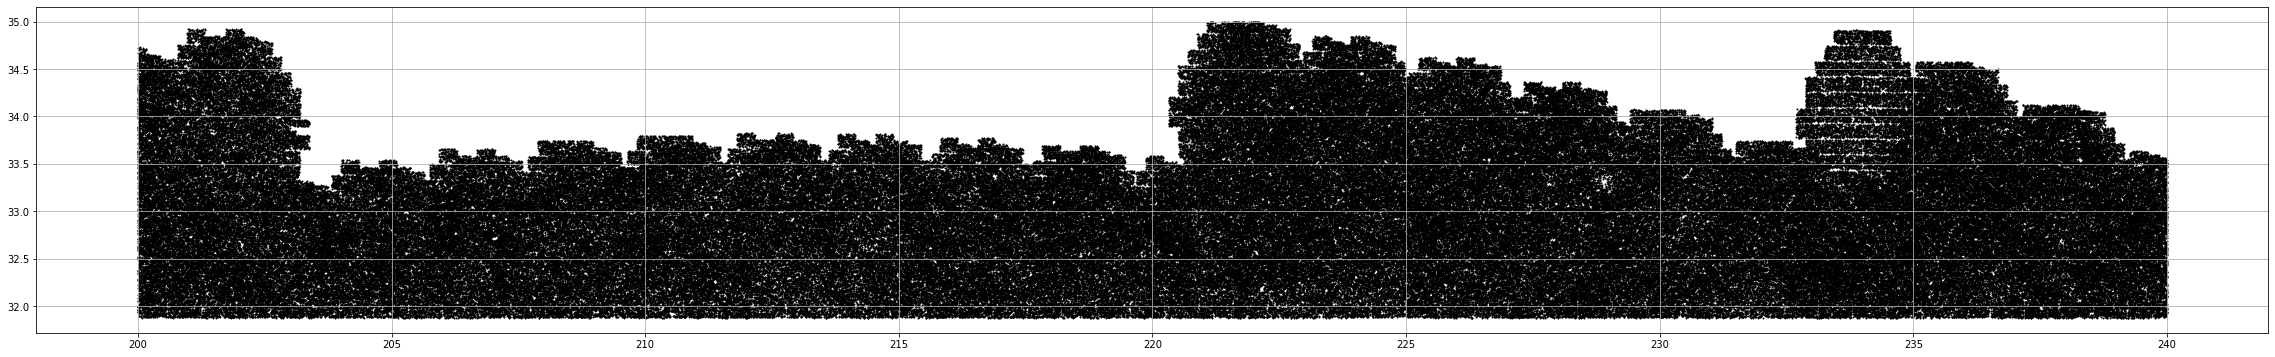

In [64]:
plt.figure(figsize=(40, 6))
plt.scatter(tab['RA_s'][nobs][::10], tab['DEC_s'][nobs][::10], c='k', s=1)
#plt.scatter(hpdict['ra'][ind], hpdict['dec'][ind], c='r', s=5)

#plt.xlim(250, 255)
#plt.ylim(30,32)
plt.grid()

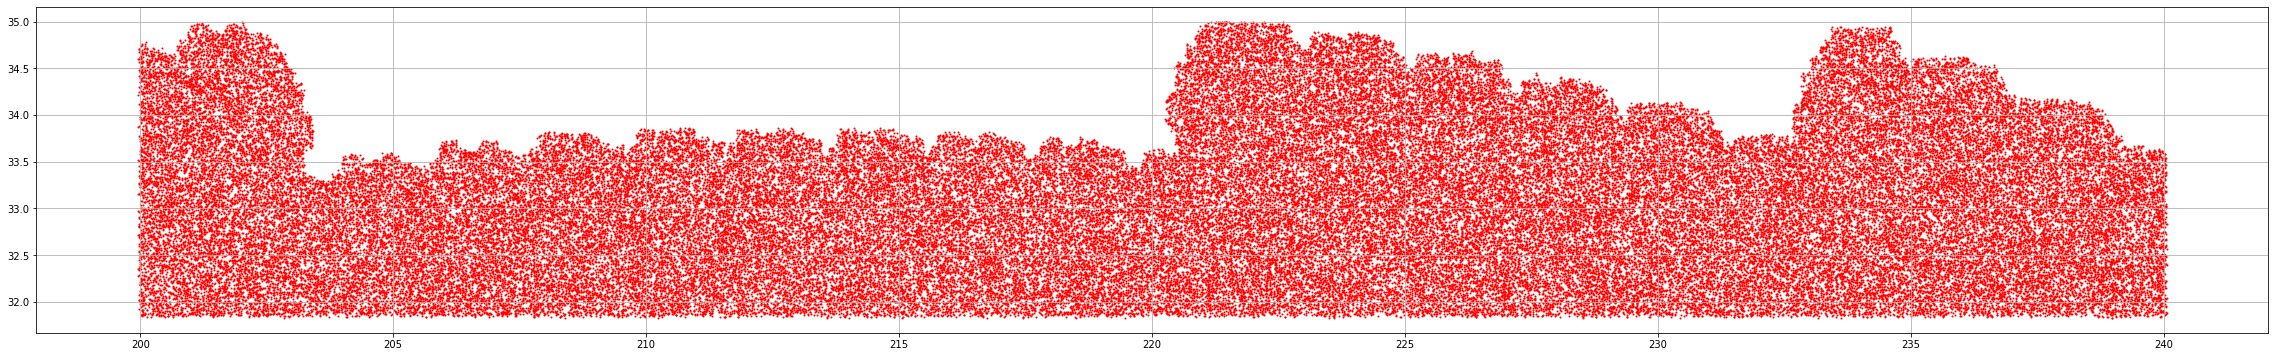

In [65]:
plt.figure(figsize=(40, 6))
plt.scatter(ran['RA'][keep][::10], ran['DEC'][keep][::10], c='r', s=1)
plt.grid()

# Load Whole DESI footprint

In [73]:
del cat_n, cat_s, cat_n_ex, cat_s_ex, mask_s, mask_n, ran, ran_ex, mask_ran, rancuts

In [11]:
#load catalogues
if dr == 'dr9sv': N = 1
else: N = Nranfiles
reg = 'desi'

#CATALOGUE
cat = np.load(filesdir+dr+'/'+version+'/'+'bgstargets'+'.npy', mmap_mode='r+')
cattmp = Table(cat)
for i in ['hppix', 'b', 'l', 'des', 'decals', 'north', 'desi', 'south']:
    cattmp[i.upper()].name = i
cat = cattmp
catinreg = (cat[reg]) & (cat['desi'])
cat = cat[catinreg]
print('CATALOGUE DONE...')

# get BGS scenarios
bgskeys = ['BGSBITS', 'RMAG', 'ZMAG', 'GMAG', 'W1MAG', 'RFIBERMAG']
bgs21 = get_bgs({i:cat[i] for i in bgskeys}, rlimit=False)
#
keep = np.zeros_like(cat['RA'], dtype=bool)
for key, val in bgs21.items():
    keep |= (val)
    
print(100*np.sum(keep)/len(cat))

# keep relevant columns only
keys = ['hppix', 'b', 'l', 'des', 'decals', 'north', 'desi', 'south', 'TYPE', 'RA', 'DEC', 'BGSBITS', 'RMAG', 'ZMAG', 'GMAG', 'W1MAG', 'RFIBERMAG', 'G']
cat0 = Table()
for key in keys:
    cat0[key] = cat[key][keep]
    
cat = cat0
del cat0

# get BGS scenarios for new catalogue
bgskeys = ['BGSBITS', 'RMAG', 'ZMAG', 'GMAG', 'W1MAG', 'RFIBERMAG']
bgs21 = get_bgs({i:cat[i] for i in bgskeys}, rlimit=False)

CATALOGUE DONE...
91.27425180436649


In [12]:
del cattmp

In [13]:
#RANDOMS
ran = np.load(filesdir+dr+'/'+dr+'_random_N'+str(N)+'.npy', mmap_mode='r+')
ran_ex = np.load(filesdir+dr+'/'+'extra_random_N'+str(N)+'_n256.npy', mmap_mode='r+')
raninreg = (ran_ex[reg]) & (ran_ex['desi'])
ran = ran[raninreg]
ran_ex = ran_ex[raninreg]
print('RANDOMS DONE...')

RANDOMS DONE...


In [14]:
catinreg = np.ones(len(cat), dtype=bool)
raninreg = np.ones(len(ran), dtype=bool)

In [15]:
#bgsmask = bgsmask()
rancuts = getGeoCuts(ran, randoms=True)

In [16]:
#Notes: This hpdict is used to get the area only using the randoms. 
#This use the randoms within the DESI footprint and without any masking (maskrand=None) as we want the area without wholes.
hpdict0 = get_dict(cat=None, pixmapfile=pixfile, hppix_ran=ran_ex['hppix'], hppix_cat=None, 
                      maskrand=((rancuts['BS']) & (rancuts['GC']) & (rancuts['nobs'])), maskcat=None, 
                           Nranfiles=Nranfiles, ranindesi=ran_ex['desi'], catindesi=None, 
                                desifootprint=True, namesels=None, target_outputs=False, log=False)


## target densities

In [27]:
bgs21.keys()

dict_keys(['clustering', 'nominal', 'fibcolor'])

In [17]:
#
rcorr = {}
objs = {'stars':'ss', 'BGS':'gg'}
for key in ['fibcolor']:
    for obj, abv in objs.items():
        z = fit_dict[key]['%s_0' %(obj)][1]
        rcorr['%s+%s' %(key, 'bass_%s' %(abv))] = cat['RMAG'] + z[0] * (cat['GMAG'] - cat['RMAG']) + z[1]
        print('%s+%s' %(key, 'bass_%s' %(abv)), z[0], z[1])

fibcolor+bass_ss -0.0345418930053711 0.01655695061934623
fibcolor+bass_gg -0.03760418891906739 0.010189114118877223


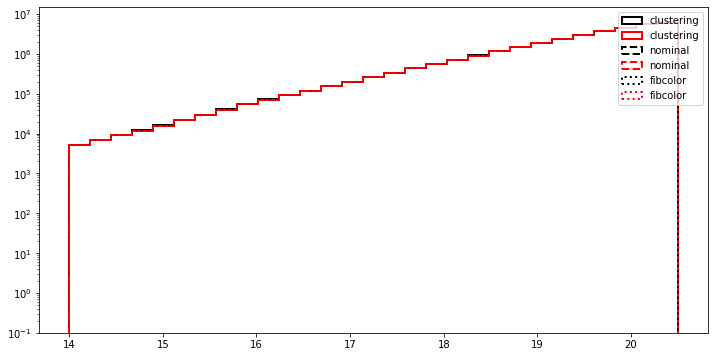

In [185]:
#
fig = plt.figure(figsize=(12,6))
ls = {'clustering':'-', 'nominal':'--', 'fibcolor':':'}
for key, val in bgs21.items():
    
    bins=np.linspace(14, 20.5, 30)
    for i in ['gg', 'ss']:
        rmag0 = rcorr['%s+bass_%s' %(key, i)]
        plt.hist(rmag0, bins=bins, histtype='step',log=True, lw=2, ls=ls[key], color='k' if i == 'gg' else 'r', label=key)
    
plt.legend()
plt.show()

In [18]:
def n_density(rmag, A, cumu=True):
    '''
    Get the cumulative number density
    '''
    
    eta = []
    ini, fin = 15, 20.5
    rbin = np.int(np.abs(ini-fin)/0.1)
    mag = np.linspace(ini, fin , rbin)
    
    if cumu:
    
        for i in range(len(mag)):

            N = np.sum(rmag < mag[i])
            eta.append([mag[i], N/A])

    else:
        
        for i in range(len(mag[:-1])):

            N = np.sum((rmag < mag[i+1]) & (rmag > mag[i]))
            eta.append([mag[i]+(0.1/2.), N/A])
            
    eta = np.array(eta).transpose()
    #print('DONE...')
    
    return eta

In [61]:
#
def eta(obj, rmag, bgs21, hpdict0, cat):
    
    etas = {}
    key = 'fibcolor'
    #obj = 'fibcolor'
    #rmag = cat['RMAG']

    for regi in ['south', 'north']:

        regi_ = cat[regi]
        keep = (bgs21[obj]) & (regi_)

        if regi != 'desi':
            A = hpdict0['bgsarea_%s' %(regi)]
        else:
            A = hpdict0['area_all']

        etas['%s+%s' %(regi, obj)] = n_density(rmag=rmag[keep], A=A, cumu=True)
        if regi == 'north':
            #for key, val in bgs21.items():
            for i in ['gg']:
                rmag0 = rcorr['%s+bass_%s' %(key, i)]
                etas['%s_%s_%s+%s' %(regi, i, key, obj)] = n_density(rmag=rmag0[keep], A=A, cumu=True)
            rmag0 = rmag-0.04
            etas['%s_%s_%s+%s' %(regi, 'cte', key, obj)] = n_density(rmag=rmag0[keep], A=A, cumu=True)

    return etas

In [62]:
#
def plot_eta(etas, bgs21, fit_dict, ylim=None, log=False, filename=None, xlim=None):
    
    ls = {'north':'-', 'south':'-', 'north_gg_fibcolor':'--', 'north_cte_fibcolor':'dotted'}
    labels = {'north':'BASS/MzLS', 'south':'DECaLS', 'north_gg_fibcolor':'BASS/MzLS with gg correction', 'north_cte_fibcolor':'BASS/MzLS with cte correction'}
    
    fig = plt.figure(figsize=(10, 5))
    
    if xlim is None:
        xlim = 15, 20.35
    
    key = list(etas.keys())[0]
    obji = key.split('+')[-1]
    item = etas['north_gg_fibcolor+%s' %(obji)]
    val = (item[0] < xlim[1]) & (item[0] > xlim[0])
    z = np.polyfit(item[0][val], np.log10(item[1][val]), 1)
    p = np.poly1d(z)
    xrange = np.linspace(xlim[0], xlim[1], 10)
    
    for num, (key, item) in enumerate(etas.items()):
        
        reg_ = key.split('+')[0]
        #if reg_ == 'north_ss_fibcolor': continue
        #if num == 0: obji = key.split('+')[-1]
        
        if log:
            plt.plot(item[0], (np.log10(item[1])-z[1])-z[0]*item[0], c='k' if reg_[:5] == 'south' else 'r', ls=ls[reg_], label=labels[reg_])
            plt.ylabel(r'$\log_{10}(\eta/\eta_{fit})$', size=25)
            print(r'$\eta_{fit} = (%.2f \times r_{mag} + %.2f)$' %(z[0] if z[0] > 0 else -1*z[0], z[1] if z[1] > 0 else -1*z[1]))
        else:
            plt.plot(item[0], np.log10(item[1]), c='k' if reg_[:5] == 'south' else 'r', ls=ls[reg_], label=labels[reg_])
            plt.ylabel(r'$\log_{10}(1/deg^2)$', size=20)
    
    
    if not log: plt.plot(xrange, p(xrange), c='b', lw=2, ls='--', alpha=0.5, label='best-fit')
            
    plt.xlabel(r'$r_{mag}$', size=25)
    
    #for obj, val in bgs21.items():
    txt_gg = '$r^{\prime}_{gg}$ = $r_{BASS}$ %s' %(fit_dict['fibcolor']['BGS_0'][0].split('=')[1])
    txt_ss = '$r^{\prime}_{ss}$ = $r_{BASS}$ %s' %(fit_dict['fibcolor']['stars_0'][0].split('=')[1])
    dy = np.abs(ylim[0]-ylim[1])/10
    plt.text(19.55, ylim[1]-dy, txt_gg, size=14)
    plt.text(19.55, ylim[1]-2*dy, txt_ss, size=14)
    
    for i in [19.5, 20]:
        plt.axvline(i, lw=2, ls='--', c='k', alpha=0.5)

    #plt.title('BGS %s' %(obji), size=18)
    plt.legend(loc='upper left')
    plt.grid()
    plt.xlim(xlim)
    #plt.ylim(450, 1550)
    if ylim is not None: plt.ylim(ylim)
    #plt.yscale('log')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    if filename is not None:
        file=os.path.join(pathdir, filename)
        print(file)
        fig.savefig(file+'.png', bbox_inches = 'tight', pad_inches = 0.1)


In [63]:
#
etafib = eta('fibcolor', cat['RMAG'], bgs21, hpdict0, {i:cat[i] for i in ['south', 'north']})

In [64]:
from scipy.interpolate import interp1d
x = etafib['south+fibcolor'][0]
y = etafib['south+fibcolor'][1]
f = interp1d(x, y)
f(19.5)

array(861.78732874)

In [65]:
x = etafib['north+fibcolor'][0]
y = etafib['north+fibcolor'][1]
f = interp1d(x, y)
f(19.54)

array(860.11832769)

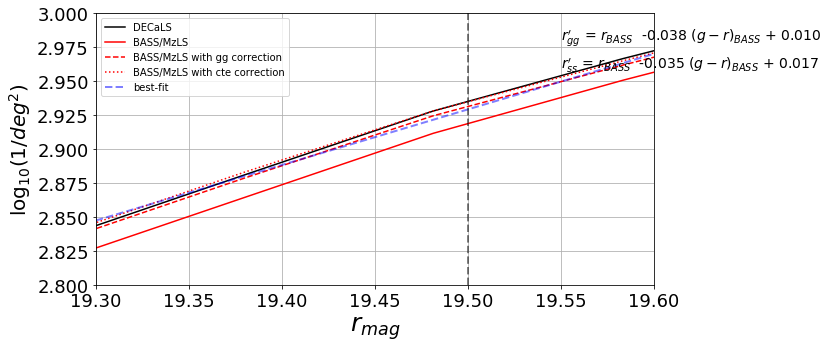

In [66]:
plot_eta(etafib, bgs21, fit_dict, ylim=[2.8, 3.0], xlim=[19.3, 19.6])
#plot_eta(etafib, bgs21, fit_dict, ylim=[0.5, 3.2])
#plot_eta(etafib, bgs21, fit_dict, ylim=[-0.05, 0.05], log=True)

$\eta_{fit} = (0.50 \times r_{mag} + 6.88)$
$\eta_{fit} = (0.50 \times r_{mag} + 6.88)$
$\eta_{fit} = (0.50 \times r_{mag} + 6.88)$
$\eta_{fit} = (0.50 \times r_{mag} + 6.88)$


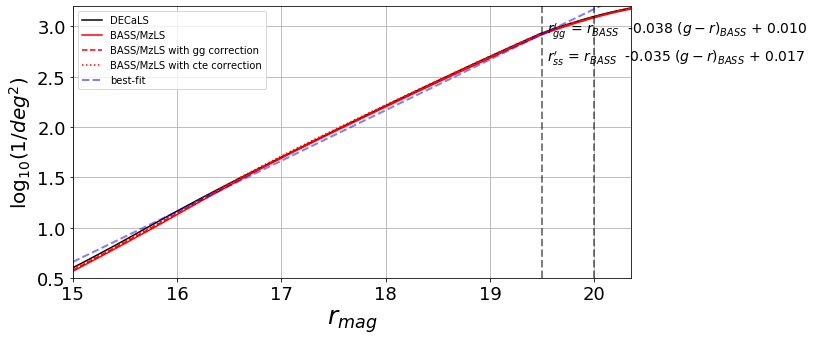

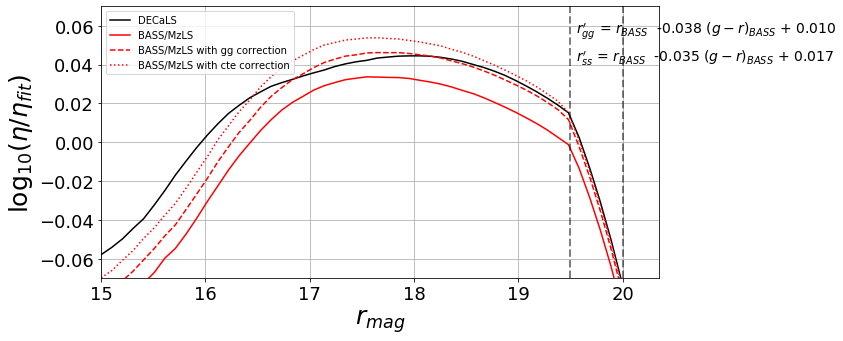

In [67]:
#plot_eta(etafib, bgs21, fit_dict, ylim=[2.68, 3.2])
plot_eta(etafib, bgs21, fit_dict, ylim=[0.5, 3.2])
plot_eta(etafib, bgs21, fit_dict, ylim=[-0.07, 0.07], log=True)

In [27]:
etaclus = eta('clustering', cat['RMAG'], bgs21, hpdict0, {i:cat[i] for i in ['south', 'north']})

$\eta_{fit} = (0.46 \times r_{mag} + 6.10)$
$\eta_{fit} = (0.46 \times r_{mag} + 6.10)$
$\eta_{fit} = (0.46 \times r_{mag} + 6.10)$
$\eta_{fit} = (0.46 \times r_{mag} + 6.10)$
/global/project/projectdirs/desi/users/qmxp55/bgstargets/doc/dr9_0.1.0_north_vs_south/log_counts_clustering


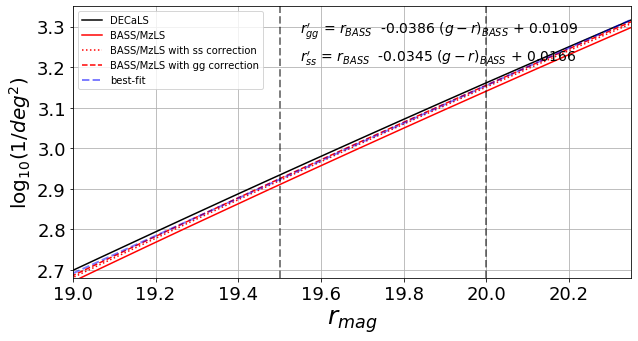

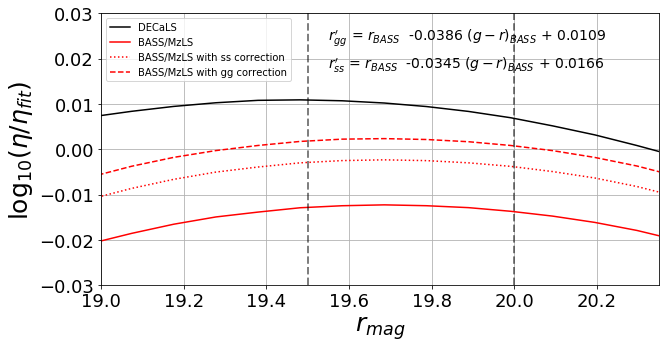

In [47]:
plot_eta(etaclus, bgs21, fit_dict, ylim=[2.68, 3.35])

In [ ]:
plot_eta(etaclus, bgs21, fit_dict, ylim=[-0.03, 0.03], log=True, filename='log_counts_clustering')

## How much target density can increase if we increase faint r-mag limit in BASS/MzLS?

In [31]:
bgs21.keys()

dict_keys(['clustering', 'nominal', 'fibcolor'])

In [26]:
#
dm = 0.03

main = {'BASS/MzLS':(cat['north']) & (bgs21['clustering']) & (cat['RMAG'] < 20),
        'DECaLS':(cat['south']) & (bgs21['clustering']) & (cat['RMAG'] < 20),
        'BASS/MzLS+ext':(cat['north']) & (bgs21['clustering']) & (cat['RMAG'] < (20+dm)),
        'BASS/MzLS+correction':(cat['north']) & (bgs21['clustering']) & (rcorr['clustering+bass_gg'] < (20))}

for key, val in main.items():
    if key == 'DECaLS':
        A = hpdict0['bgsarea_%s' %('south')]
    else:
        A = hpdict0['bgsarea_%s' %('north')]
    print('%s: \t %.0f /deg^2' %(key, np.sum(val)/A))


KeyError: 'clustering+bass_gg'

In [68]:
#
dm = 0.040
rlimit = 19.5
key = 'fibcolor'

main = {'BASS/MzLS':(cat['north']) & (bgs21[key]) & (cat['RMAG'] < rlimit),
        'DECaLS':(cat['south']) & (bgs21[key]) & (cat['RMAG'] < rlimit),
        'BASS/MzLS+ext':(cat['north']) & (bgs21[key]) & (cat['RMAG'] < (rlimit+dm)),
        'BASS/MzLS+correction':(cat['north']) & (bgs21[key]) & (rcorr['%s+bass_gg' %(key)] < (rlimit))}

for key, val in main.items():
    if key == 'DECaLS':
        A = hpdict0['bgsarea_%s' %('south')]
    else:
        A = hpdict0['bgsarea_%s' %('north')]
    print('%s: \t %.0f /deg^2' %(key, np.sum(val)/A))


BASS/MzLS: 	 832 /deg^2
DECaLS: 	 864 /deg^2
BASS/MzLS+ext: 	 861 /deg^2
BASS/MzLS+correction: 	 855 /deg^2


# DEV ZONE...

In [67]:
#increase in BASS target density with the transfomartion
maskn = (bgs21_s) & (nobs) & (tab['RMAG_n'] < 20)
maskn2 = (bgs21_s) & (nobs) & (rcorr['bass_gg'] < 20)
inc = ((np.sum(maskn2)/hpdict['redarea'] - np.sum(maskn)/hpdict['redarea']) * 100) / (np.sum(maskn)/hpdict['redarea'])
print('With gg transformation, we can increase the target density in BASS up to: \t %.2f %%' %(inc))
#print(np.sum(maskn)/hpdict['redarea'], np.sum(maskn2)/hpdict['redarea'])

With gg transformation, we can increase the target density in BASS up to: 	 3.43 %


### What if we extend the rmag limit for BGS in BASS/MzLS?

In [123]:
#
key = 'BGS in DECaLS but not BGS in BASS/MzLS [1/sq.deg]'
decals_nominal = (bgs_s) & (~bgs_n) & (nobs)
decals_ext = (bgs_s) & ~((bgs21_n) & (tab['RMAG_n'] < r_bass)) & (nobs)
decals_diff = (decals_nominal) & (~decals_ext)

bass_nominal = (bgs21_n) & (tab['RMAG_n'] < 20) & (nobs)
bass_ext = (bgs21_n) & (tab['RMAG_n'] < r_bass) & (nobs)
bass_diff = (bass_ext) & (~bass_nominal)

print('BGS BASS/MzLS density [1/sq.deg]: \t %.3f(NOMINAL) \t %.3f(EXT) \t %.3f(DIFF)' 
      %(np.sum(bass_nominal)/hpdict['redarea'],
       np.sum(bass_ext)/hpdict['redarea'],
       np.sum(bass_diff)/hpdict['redarea']))

print('%s: \t %.3f(NOMINAL) \t %.3f(EXT) \t %.3f(DIFF)' 
      %(key, np.sum(decals_nominal)/hpdict['redarea'],
       np.sum(decals_ext)/hpdict['redarea'],
       np.sum(decals_diff)/hpdict['redarea']))


BGS BASS/MzLS density [1/sq.deg]: 	 1318.794(NOMINAL) 	 1293.898(EXT) 	 0.000(DIFF)
BGS in DECaLS but not BGS in BASS/MzLS [1/sq.deg]: 	 66.082(NOMINAL) 	 84.554(EXT) 	 0.000(DIFF)


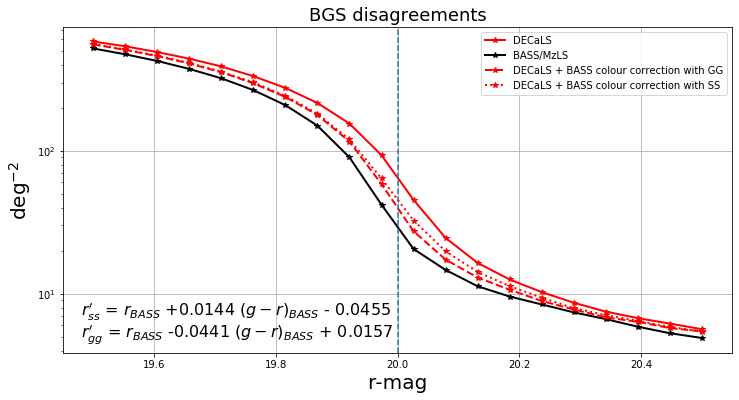

In [143]:
#'$r_{DECaLS}-r_{BASS}$ = 0.0144 $(g-r)_{BASS}$ + -0.0455'
#'$r_{DECaLS}-r_{BASS}$ = -0.0441 $(g-r)_{BASS}$ + 0.0157'
plt.figure(figsize=(12,6))

rbins = np.linspace(19.5, 20.5, 20)

res = []
res_gg = []
res_ss = []
rmag_decals_gg = tab['RMAG_n'] - 0.0441 * (tab['GMAG_n'] - tab['RMAG_n']) + 0.0157
rmag_decals_ss = tab['RMAG_n'] + 0.0144 * (tab['GMAG_n'] - tab['RMAG_n']) - 0.0455

for i in rbins:
    
    decals = (bgs_s) & ~((bgs21_n) & (tab['RMAG_n'] < i)) & (nobs)
    bass = (bgs_n) & ~((bgs21_s) & (tab['RMAG_s'] < i)) & (nobs)
    
    decals_gg = (bgs_s) & ~((bgs21_n) & (rmag_decals_gg < i)) & (nobs)
    decals_ss = (bgs_s) & ~((bgs21_n) & (rmag_decals_ss < i)) & (nobs)
    
    res.append([i, np.sum(decals)/hpdict['redarea'], np.sum(bass)/hpdict['redarea']])
    res_gg.append([i, np.sum(decals_gg)/hpdict['redarea'], np.sum(bass)/hpdict['redarea']])
    res_ss.append([i, np.sum(decals_ss)/hpdict['redarea'], np.sum(bass)/hpdict['redarea']])

res = np.transpose(res)
res_gg = np.transpose(res_gg)
res_ss = np.transpose(res_ss)

plt.plot(res[0], res[1], marker='*', lw=2, c='r', label='DECaLS')
plt.plot(res[0], res[2], marker='*', lw=2, c='k', label='BASS/MzLS')
plt.plot(res2[0], res_gg[1], marker='*', lw=2, ls='--', c='r', label='DECaLS + BASS colour correction with GG')
plt.plot(res2[0], res_ss[1], marker='*', lw=2, ls=':', c='r', label='DECaLS + BASS colour correction with SS')
plt.axvline(20, ls='--')
#plt.axvline(r_bass, ls=':')
plt.grid()

txt_gg = '$r^{\prime}_{gg}$ = $r_{BASS}$ -0.0441 $(g-r)_{BASS}$ + 0.0157'
txt_ss = '$r^{\prime}_{ss}$ = $r_{BASS}$ +0.0144 $(g-r)_{BASS}$ - 0.0455'
plt.text(19.48, 5, txt_gg, size=16)
plt.text(19.48, 7, txt_ss, size=16)

plt.title('BGS disagreements', size=18)
plt.xlabel(r'r-mag', size=20)
plt.ylabel(r'deg$^{-2}$', size=20)
plt.legend()
plt.yscale('log')



### Why do we have such a big difference between BGS in BASS/MzLS and BGS in DECaLS?

In [35]:
Grr_s = tab['G_s'] - 22.5 + 2.5*np.log10(tab['FLUX_R_s'])
Grr_n = tab['G_n'] - 22.5 + 2.5*np.log10(tab['FLUX_R_n'])

In [36]:
#
keep = {'BGS in DECaLS but not BGS in BASS/MzLS':(bgs_s) & (~bgs_n) & (nobs), 
        'BGS in BASS/MzLS but not BGS in DECaLS':(~bgs_s) & (bgs_n) & (nobs)}

for num, key, val in zip([0, 1],keep.keys(), keep.values()):
    
    print('========== %s (%.3f [1/sq.deg]) ==========' %(key, np.sum(val)/hpdict['redarea']))
    
    for i in set(tab['TYPE_n'][:10000]):
        morph_n = np.sum((tab['TYPE_n'] == i) & (val))/hpdict['redarea']
        morph_s = np.sum((tab['TYPE_s'] == i) & (val))/hpdict['redarea']
        print('%s: \t %.3f(north) \t %.3f(south)' %(i, morph_n, morph_s))

    if num == 0: 
        bgsbits = tab['BGSBITS_n']
        rmag = tab['RMAG_n']
        print('WHY NOT BGS in BASS/MzLS?')
    if num == 1: 
        bgsbits = tab['BGSBITS_s']
        rmag = tab['RMAG_s']
        print('WHY NOT BGS in DECaLS?')
        
    bgslist = ['BS', 'LG', 'GC', 'nobs', 'SG', 'FMC2', 'CC', 'QC_FM', 'QC_FI', 'QC_FF']
    for i in bgslist:
        mask = ((bgsbits & 2**(bgsmask()[i])) == 0) & (val) & (rmag<20)
        print('reject by %s & rmag < 20: \t %.4f' % (i, np.sum(mask)/hpdict['redarea']))
    print('reject by rmag > 20: \t %.4f' % (np.sum((val) & (rmag>20))/hpdict['redarea']))
    
    

========== BGS in DECaLS but not BGS in BASS/MzLS (70.216 [1/sq.deg]) ==========
SER: 	 12.918(north) 	 20.087(south)
DUP: 	 0.000(north) 	 0.000(south)
PSF: 	 1.437(north) 	 0.710(south)
EXP: 	 12.954(north) 	 9.706(south)
REX: 	 21.524(north) 	 11.889(south)
DEV: 	 21.382(north) 	 27.824(south)
WHY NOT BGS in BASS/MzLS?
reject by BS & rmag < 20: 	 0.0000
reject by LG & rmag < 20: 	 0.0000
reject by GC & rmag < 20: 	 0.0000
reject by nobs & rmag < 20: 	 0.0000
reject by SG & rmag < 20: 	 0.6566
reject by FMC2 & rmag < 20: 	 0.0887
reject by CC & rmag < 20: 	 0.1952
reject by QC_FM & rmag < 20: 	 5.1992
reject by QC_FI & rmag < 20: 	 0.3726
reject by QC_FF & rmag < 20: 	 1.0469
reject by rmag > 20: 	 62.9408
========== BGS in BASS/MzLS but not BGS in DECaLS (32.988 [1/sq.deg]) ==========
SER: 	 8.837(north) 	 9.600(south)
DUP: 	 0.000(north) 	 0.000(south)
PSF: 	 0.213(north) 	 0.852(south)
EXP: 	 4.827(north) 	 7.116(south)
REX: 	 4.880(north) 	 11.215(south)
DEV: 	 14.231(north) 	 4.

In [139]:
8.5002*hpdict['redarea']

2628.00626732

========== BGS in DECaLS but not BGS in BASS/MzLS (70.216 [1/sq.deg]) ==========


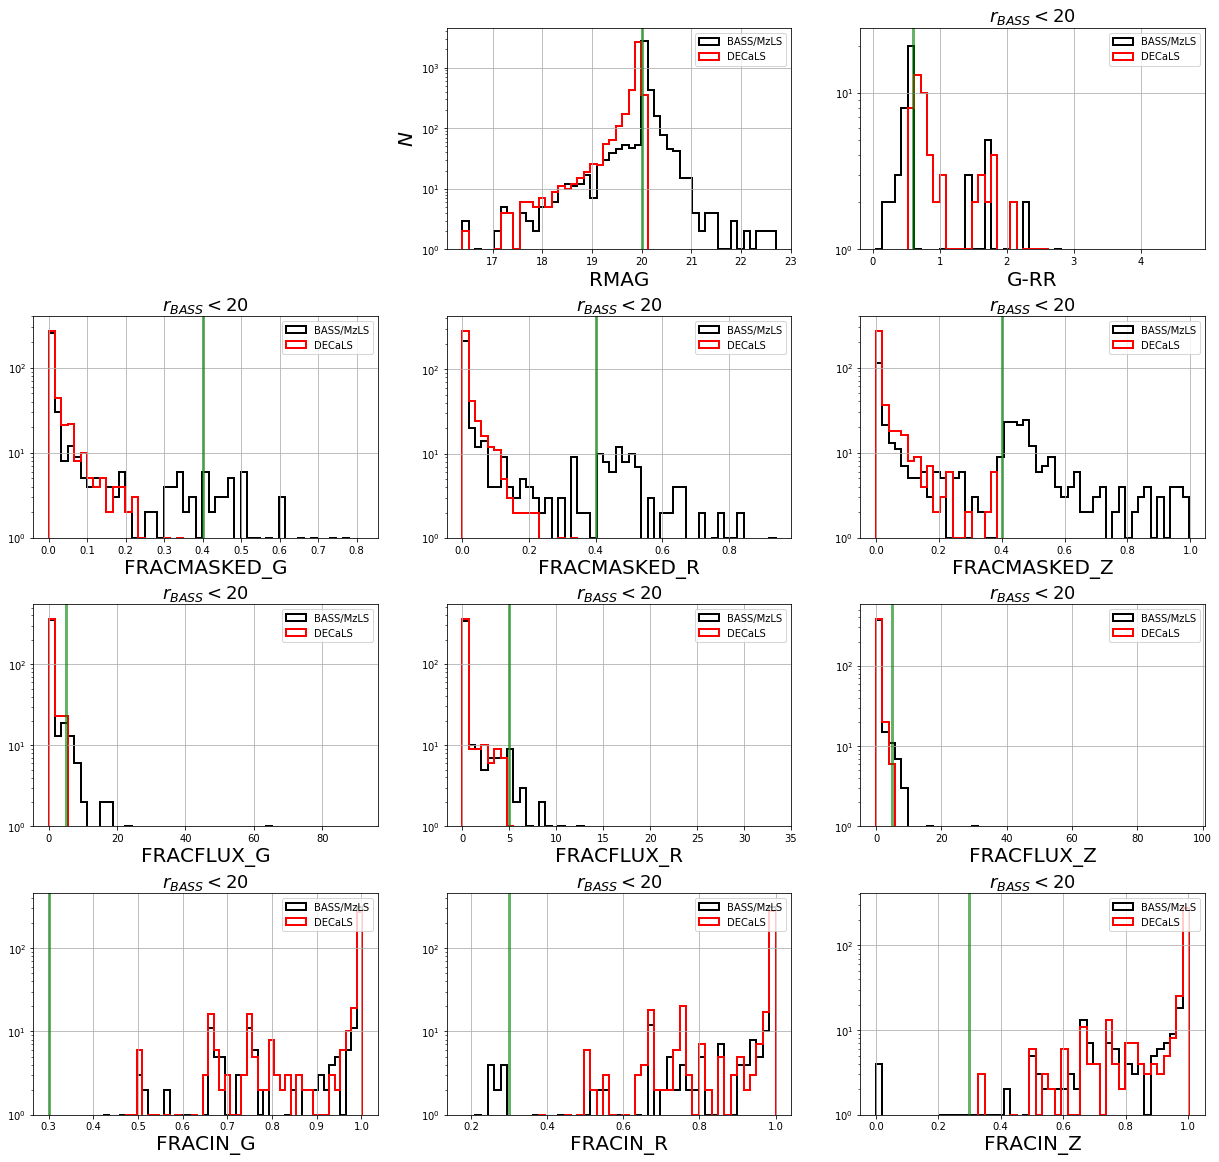

========== BGS in BASS/MzLS but not BGS in DECaLS (32.988 [1/sq.deg]) ==========


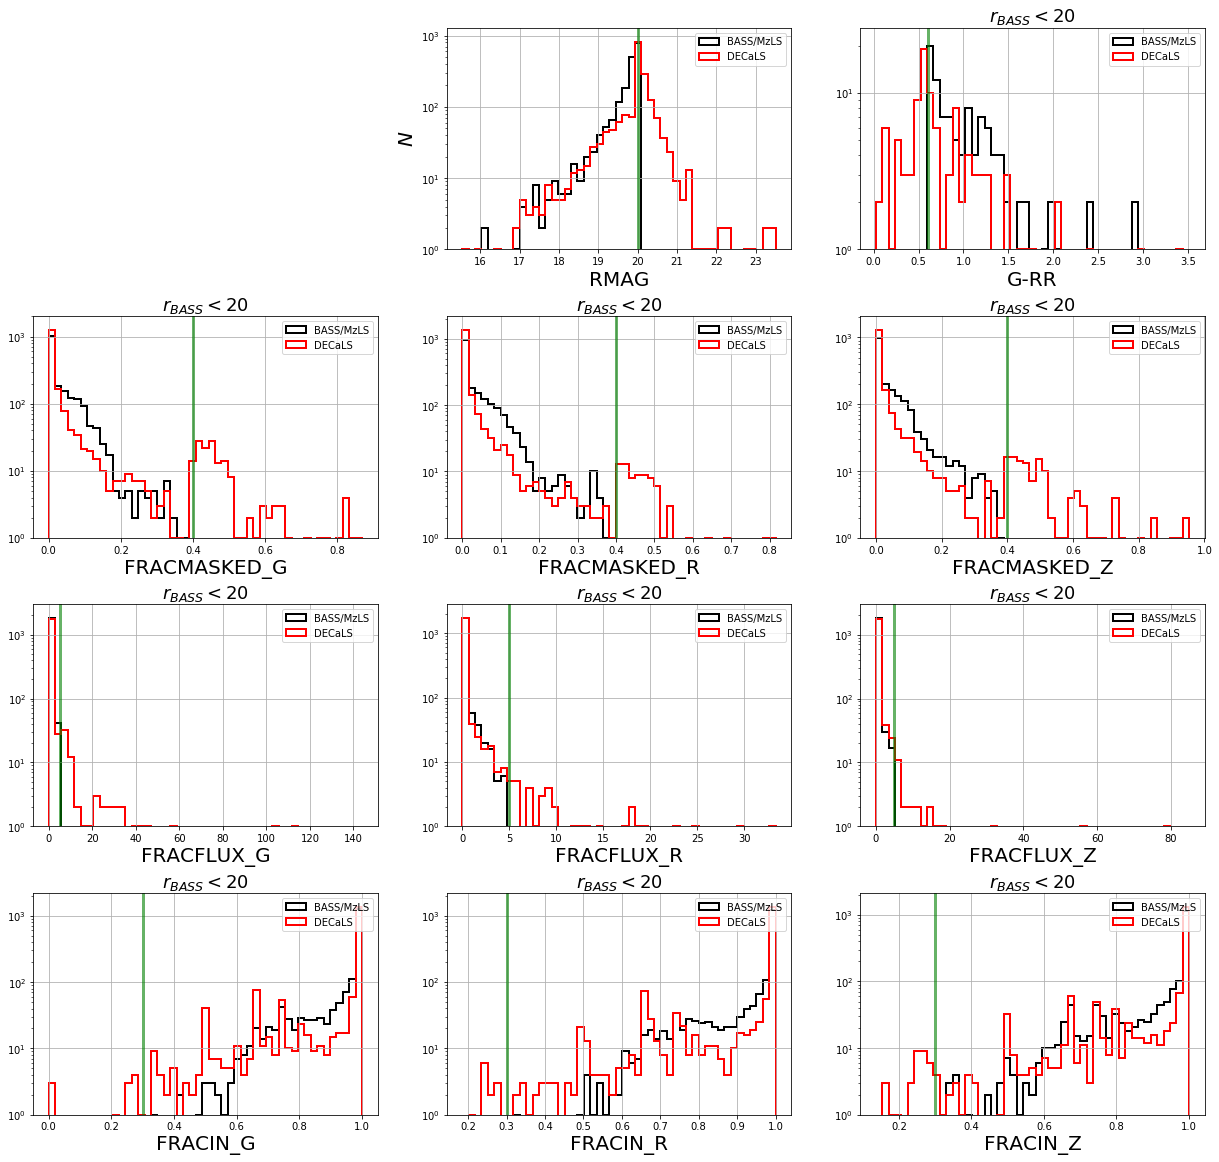

In [37]:
#
keep = {'BGS in DECaLS but not BGS in BASS/MzLS':(bgs_s) & (~bgs_n) & (nobs), 
        'BGS in BASS/MzLS but not BGS in DECaLS':(~bgs_s) & (bgs_n) & (nobs)}

for num, key, val in zip([0, 1],keep.keys(), keep.values()):
    
    print('========== %s (%.3f [1/sq.deg]) ==========' %(key, np.sum(val)/hpdict['redarea']))
    
    rows, cols = 4, 3
    fig    = plt.figure(figsize=(7*cols,5*rows))
    gs     = gridspec.GridSpec(rows, cols, hspace=0.3, wspace=0.20)
    
    plots = ['RMAG', 'G-RR', 'FRACMASKED_G', 'FRACMASKED_R', 'FRACMASKED_Z', 
             'FRACFLUX_G', 'FRACFLUX_R', 'FRACFLUX_Z', 'FRACIN_G', 'FRACIN_R', 'FRACIN_Z']
    
    for num, plot in enumerate(plots):
        
        ax = fig.add_subplot(gs[num+1])
        
        if plot != 'RMAG': 
            val = (val) & (tab['RMAG_n'] < 20)
            ax.set_title(r'$r_{BASS} < 20$', size=18)
            
        if plot == 'G-RR':
            xn = Grr_n[(val) & (tab['G_n'] != 0) & (tab['G_s'] != 0)]
            xs = Grr_s[(val) & (tab['G_n'] != 0) & (tab['G_s'] != 0)]
        else:
            xn = tab[plot+'_n'][val]
            xs = tab[plot+'_s'][val]
        
        xn = xn[np.isfinite(xn)]
        xs = xs[np.isfinite(xs)]
        #print('%s north:\t %i' %(plot, len(xn)))
        #print('%s south:\t %i' %(plot, len(xs)))
        
        if plot == 'RMAG': vline = 20
        elif plot == 'G-RR': vline = 0.6
        elif plot[:10] == 'FRACMASKED': vline = 0.4
        elif plot[:8] == 'FRACFLUX': vline = 5.0
        elif plot[:6] == 'FRACIN': vline = 0.3
            
        xnlims = np.percentile(xn, (0.1, 99.9))
        xslims = np.percentile(xs, (0.1, 99.9))
        
        bins = np.linspace(np.min([xnlims[0], xslims[0]]), np.max([xnlims[1], xslims[1]]), 50)

        ax.hist(xn, bins=bins, histtype='step', lw=2, color='k', log=True, label='BASS/MzLS')
        ax.hist(xs, bins=bins, histtype='step', lw=2, color='r', log=True, label='DECaLS')
        ax.axvline(vline, lw=3, color='green', alpha=0.6)
        ax.set_xlabel(r'%s' %(plot), size=20)
        if num == 0: ax.set_ylabel(r'$N$', size=20)
        ax.legend()
        ax.grid()
        ax.set_ylim(1, None)
     
    file = pathdir+'/bgs_diff_%i' %(num)
    fig.savefig(file+'.png', bbox_inches = 'tight', pad_inches = 0)
    plt.show()
    

    